# 📥 Radioactive lighthouse problem

Goal: Explore a classic problem from Gull (by way of Sivia's book with some tweaks).

<!-- 
<div style="float:left;"><img src="../../_images/radioactive_lighthouse_problem_figure.png" width=300px></div>
 -->
<div style="float:left;"><img src="https://raw.githubusercontent.com/buqeye/LearningFromData/main/LectureNotes/_images/radioactive_lighthouse_problem_figure.png" width=300px></div>

In the figure, a radioactive source that emits gamma rays randomly in time but uniformly in angle is placed at $(x_0, y_0)$.  The gamma rays are detected on the $x$-axis and these positions are saved, $x_k$, $k=1,2,\cdots, N$.  Given these observed positions, the problem is to estimate the location of the source.

Initially we'll assume that we know that $y_0 = 1$ (in whatever length units we are implicitly using), so our goal is to estimate $x_0$.  We introduce the angle $\theta$ between the $\gamma$ ray and the $y$-axis (with $\theta = 0$ meaning the gamma ray is detected at $x_0$).

Refs:
* D.S. Sivia, *Data Analysis, A Bayesian Tutorial*
* S.F. Gull, *Bayesian Inductive Inference and Maximum Entropy*

$% Some LaTeX definitions we'll use.
\newcommand{\pr}{p}
\newcommand{\xmax}{x_{0,\textrm{max}}}
\newcommand{\xmin}{x_{0,\textrm{min}}}
\newcommand{\Nmax}{N_{\textrm{max}}}$

**Answer the questions in** *italics*. **Check with your neighbors and ask for help if you get stuck or are unsure.**

1. Claim: in the $p(\cdot|\cdot)$ notation, our goal is to find the posterior pdf $p(x_0 | \{x_k\}, y_0)$.  *How would you translate this posterior to words?*
<br>
<br>
The probability distribution that the source is at $x=x_0$, given we know a list of x values of detections $\{x_k\}$ and that the the source is at $y=y_0$
<br>
<br>
3. *By Bayes' theorem, how is this posterior related to $p(\{x_k\} | x_0, y_0)$, $p(x_0 | y_0)$, and $p(\{x_k\}|y_0)$?*
<br>
<br>
$p(x_0 | \{x_k\}, y_0) = \frac{p(\{x_k\} | x_0, y_0) * p(x_0 | y_0)}{p(\{x_k\}|y_0)}$
<br>
<br>
4. Claim: because the denominator pdf in 2. is independent of $x_0$, it is just a normalization factor for $p(x_0 | \{x_k\}, y_0)$, so we don't need to calculate it explicitly.  *Do you understand this?  What good is an unnormalized posterior $p(x_0 | \{x_k\}, y_0)$?*
<br>
<br>
Yes I understand this, if we just want to see the distribution and see the most likely point then we don't care about multiplying something by a constant. And that is exactly what $p(\{x_k\}|y_0)$ is with respect to $x_0$, so for our purposes we can ignore it.
<br>
<br>
5. Let's take for the prior pdf $p(x_0 | y_0)$ that

$$p(x_0 | y_0) = p(x_0) = \frac{1}{|x_{0,\textrm{max}} - x_{0,\textrm{min}}|} 
      \quad\mbox{for}\ x_{0,\textrm{min}} < x_0 < x_{0,\textrm{max}} $$
   
and zero elsewhere.  *What are we assuming?  Why is this more plausible than letting $x_0$ be anything? Why do we assume a constant pdf?  Is this pdf normalized?*
<br>
<br>
We are assuming that the x distribution is independent from a possible y distribution, that there is only a set finite range in which it is possible for the source to be, and that in that range the chance of a position is the same as any other in that range. We assume a constant pdf because nothing about the problem tells us that the source should be centered or towards the edge, and with no other info we can only say that all positions are equally likely. This pdf is normalized, if the integral is done from -inf to inf, only the range xmin to xmax survives, and then that length is divided by the length to give 1.
<br>
<br>
5. *If we assume that the $x_k$s are independent, then how is $p(\{x_k\}|x_0, y_0)$ simplified?  Is this a justifiable assumption?*
<br>
<br>
$p(\{x_k\}|x_0, y_0) = \prod_{k=1}^{N} p(x_k|x_0, y_0)$ It is a fine assumption that $x_k$s are independent, we know from physics that the angle of emitted radiation is uniform random (independent)
<br>
<br>
6. *Show that for a particular $k$,*
   
$$ p(x_k|x_0, y_0) = \frac{y_0}{\pi} \frac{1}{y_0^2 + (x_k - x_0)^2} \;, $$

*given that the angular distribution from $\theta_k$ is uniform from $-\pi/2$ to $\pi/2$, so $p(\theta_k|x_0,y_0) = 1/\pi$, and also that*

$$ p(\theta_k|x_0, y_0)\, d\theta_k = p(x_k | x_0, y_0)\, dx_k \;.$$ 


<br>
<br>
Starting from the second equation, we can substitute $p(\theta_k|x_0,y_0) = 1/\pi$ in and divide both sides by $dx_k$ to give us $$ 1/\pi * \frac{d\theta_k}{dx_k} = p(x_k | x_0, y_0)\, dx_k \;$$
<br>
Next we want to evaluate the derivative. So to find $\theta(x)$, we use trigonometry to find $x_k = x_o + \sqrt{(x_k-x_0)^2 + y_0^2} * sin(\theta)$, which we can reverse to find $\theta = arcsin(\frac{x_k-x_0}{\sqrt{(x_k-x_0)^2 + y_0^2}})$. 
Then taking the derivative of this, we find that $\frac{d\theta_k}{dx_k} = \frac{y_0}{(x_k-x_0)^2 + y_0^2}$.
Plugging this in gives us the correct answer.
<br>
<br>
*Why is the latter true?*
<br>
<br>
The latter is true because when we take the integral over all angles / positions, the two both give 1 due to normalization. Then we can rename the variables, and see that the two integrands are also the same>
<br>
<br>
<br>
<br>
7. Ok, now we're ready to see what the estimates for $x_0$ look like. Use the following code to generate a set of random $x$ points for a Cauchy distribution.  *Look up the Stats documentation for a Cauchy distribution (google "scipy stats cauchy") to verify it is the same function derived above (note the use of `loc` and `scale`).  Run it a few times to see the fluctuations in the distribution.* <br>
    *What can you say about the tails of this distribution compared to your experience with Gaussian distributions?*
<br>
<br>
The tails of the cauchy distribution go for longer than the gaussian and also the data seems to fluctuate more, although this maybe has something to do with the bin size.
More than 50% of the data is outside of the FWHM
<br>

In [2]:
%matplotlib inline   

import numpy as np

import scipy.stats as stats
from scipy.stats import cauchy, uniform

import matplotlib.pyplot as plt
import seaborn as sns; sns.set() # for plot formatting
#sns.set_context("talk")

maximum =  1013.9245502084348
minimum =  -502.9037554769996


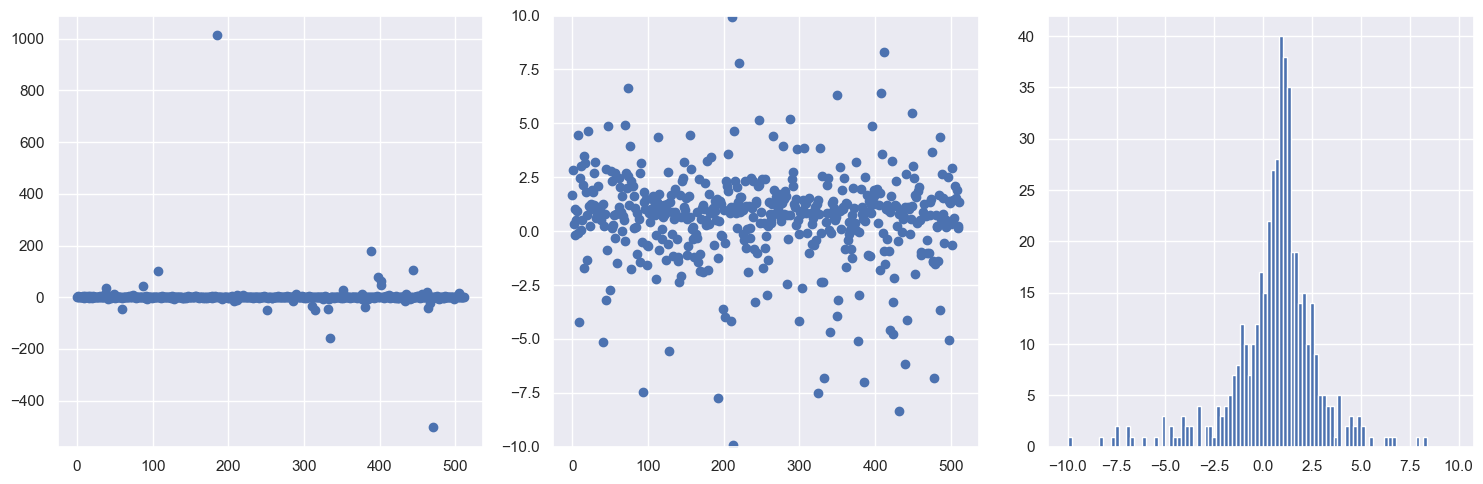

In [12]:
# True location of the radioactive source
x0_true = 1.
y0_true = 1.

# Generate num_pts random numbers distributed according to dist and plot 
num_pts = 512
x_pts = np.arange(num_pts)

# Distribution knowing where the source is: scipy.stats.cauchy(loc, scale)
dist = cauchy(x0_true, y0_true)
dist_pts = dist.rvs(num_pts)  

# Make some plots!
fig = plt.figure(figsize=(15,5))

# First plot all the points, letting it autoscale the counts
ax_1 = fig.add_subplot(1,3,1)
ax_1.scatter(x_pts, dist_pts)  

# Repeat but zoom in to near the origin
ax_2 = fig.add_subplot(1,3,2)
ax_2.scatter(x_pts, dist_pts)
ax_2.set_ylim(-10.,10.)

# Finally make a zoomed-in histogram
ax_3 = fig.add_subplot(1,3,3)
out = ax_3.hist(dist_pts, bins=np.arange(-10., 10., 0.2))

# Print out the numerical limits (max and min)
print('maximum = ', np.amax(dist_pts))
print('minimum = ', np.amin(dist_pts))

fig.tight_layout()

&nbsp; 8. Now you'll repeat the same graphs, but this time generate the distribution of points starting with a uniform distribution in angle between $-\pi/2$ and $\pi/2$. *In particular, at the `###`, write the formula for `dist_pts` in terms of `theta_dist` and `x0_true`, `y0_true`.*
<br>

maximum =  904.1673904631954
minimum =  -185.2062029342842


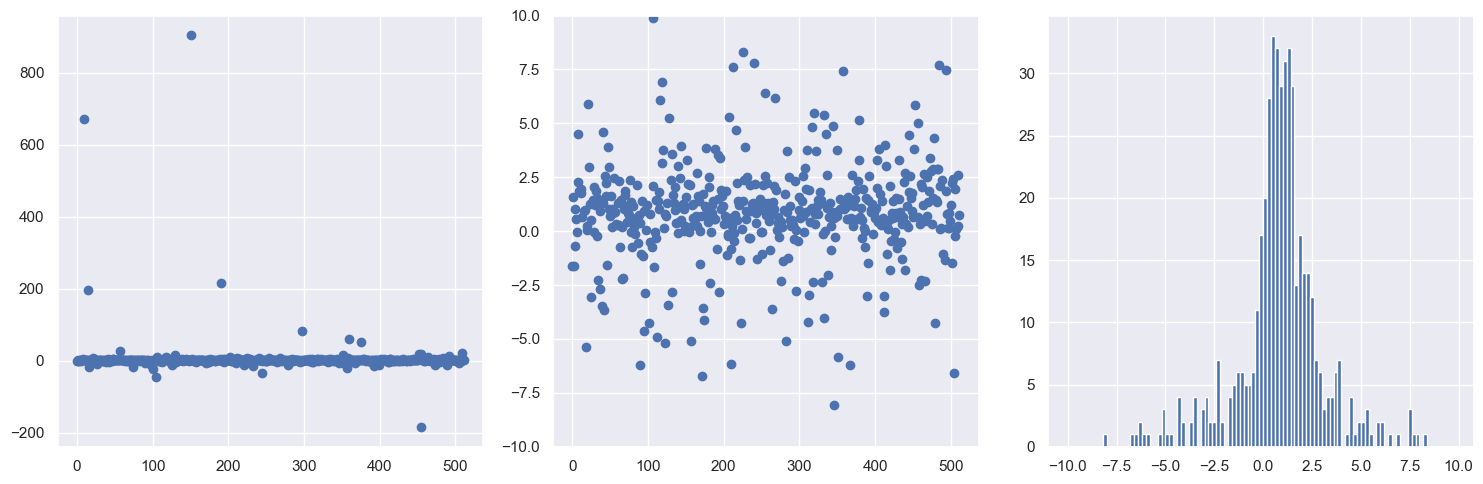

In [10]:
# True location of the radioactive source
x0_true = 1.
y0_true = 1.

# Generate num_pts random numbers distributed according to dist and plot 
num_pts = 512
x_pts = np.arange(num_pts)

# Uniform distribution in theta: uniform(a,b) in [a, a+b]
theta_dist = uniform(-np.pi/2., np.pi)

dist_pts_alt = x0_true + y0_true * np.tan(theta_dist.rvs(num_pts)) ### Fill in formula here for x_k points
#WRONG FORMULA: y0_true / (np.pi * (y0_true**2 + (x_pts - x0_true)**2))
        
# Make some plots!
fig = plt.figure(figsize=(15,5))

# First plot all the points, letting it autoscale the counts
ax_1 = fig.add_subplot(1,3,1)
ax_1.scatter(x_pts, dist_pts_alt)  

# Repeat but zoom in to near the origin
ax_2 = fig.add_subplot(1,3,2)
ax_2.scatter(x_pts, dist_pts_alt)
ax_2.set_ylim(-10.,10.)

# Finally make a zoomed-in histogram
ax_3 = fig.add_subplot(1,3,3)
out = ax_3.hist(dist_pts_alt, bins=np.arange(-10., 10., 0.2))

# Print out the numerical limits (max and min)
print('maximum = ', np.amax(dist_pts_alt))
print('minimum = ', np.amin(dist_pts_alt))

fig.tight_layout()

Before moving on, let's do some more plotting of histograms with different numbers of samples to build some intuition.  We define a plotting function first so it is easy to plot several histograms all at once. Run it several times to see the nature of the fluctuations.

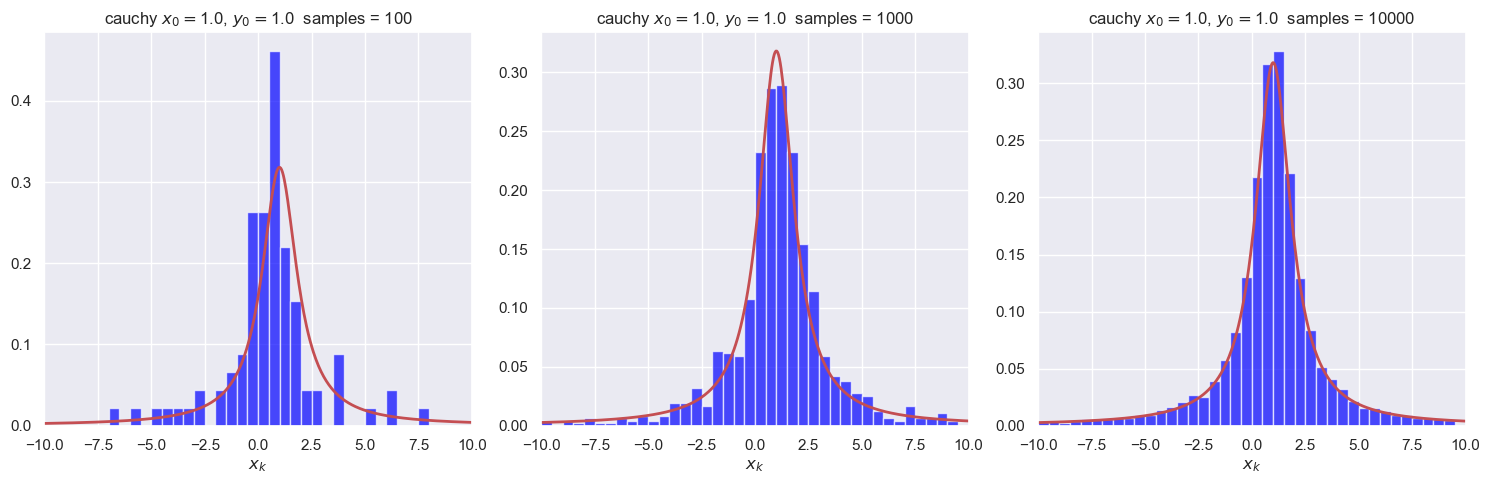

In [3]:
def dist_hist_plot(ax, name, x_dist, dist, num_samples, bin_width, 
                   x_label=None):
    """
       Plot a pdf and histogram of samples with specified list of points to 
       be plotted, which sets the range of the histogram, and width of bins.
       
       Parameters:
       -----------
       ax (matplotlib axis): axis for the histogram
       name (string): description of 
       x_dist (ndarray): points to be plotted 
       dist (scipy.stats distribution): pdf to make draws from
       num_samples (int): number of draws to make from dist
       bin_width (float): width of each bin to be plotted
       x_label (string): label for the x-axis
    """
    samples = dist.rvs(size=num_samples)   # generate num_samples draws
    bin_bounds = np.arange(x_dist[0], x_dist[-1], bin_width)
    count, bins, ignored = ax.hist(samples, bins=bin_bounds, density=True,
                                   color='blue', alpha=0.7)
    ax.plot(x_dist, dist.pdf(x_dist), linewidth=2, color='r')
    title_string = name + f'  samples = {num_samples:d}'
    ax.set_title(title_string)
    ax.set_xlim(x_dist[0], x_dist[-1])
    if x_label:
        ax.set_xlabel(x_label)
    
x_max = 10.    
x_dist = np.linspace(-x_max, x_max, 500)
name = rf'cauchy $x_0=${x0_true:1.1f}, $y_0=${y0_true:1.1f}'
fig = plt.figure(figsize=(15,5))
bin_width = 0.5
x_label = r'$x_k$'

num_samples = 100
cauchy_dist = stats.cauchy(x0_true, y0_true)
ax_1 = fig.add_subplot(1, 3, 1)
dist_hist_plot(ax_1, name, x_dist, cauchy_dist, num_samples, 
               bin_width, x_label)

num_samples = 1000
cauchy_dist = stats.cauchy(x0_true, y0_true)
ax_2 = fig.add_subplot(1, 3, 2)
dist_hist_plot(ax_2, name, x_dist, cauchy_dist, num_samples, 
               bin_width, x_label)

num_samples = 10000
cauchy_dist = stats.cauchy(x0_true, y0_true)
ax_3 = fig.add_subplot(1, 3, 3)
dist_hist_plot(ax_3, name, x_dist, cauchy_dist, num_samples, 
               bin_width, x_label)

fig.tight_layout()

## Define and plot the posterior for $x_0$

&nbsp;9. In this section the posterior for $x_0$ is calculated and plotted for different numbers of data.  The prior is taken to be a uniform PDF from $-4$ to $4$ (we really don't believe it is bigger than that but otherwise we don't know what it is). For each $\Nmax$, besides plotting the posterior for $x_0$, we calculate the mean of the posterior (denoted $\langle x_0\rangle$) and the mean of the set of $\Nmax$ points (denoted $\overline x_0$). 

In [25]:
def log_prior(x0, y0_true, x_min=-4., x_max=+4.):
    """
    Log uniform prior from x_min to x_max.  Not normalized!
    """
    if (x0 > x_min) and (x0 < x_max):
        return 0.
    else:
        return -np.inf    # log(0) = -inf
    
def log_likelihood(x0, y0_true, dist_pts, N_max): 
    """
    Log likelihood for the first N_max points of the dist_pts array,
    assuming independent.  Not normalized!  
    """
    L_pts = -np.log(y0_true**2 + (dist_pts[0:N_max] - x0)**2)
    return sum(L_pts)

def posterior_calc(x0_pts, y0_true, dist_pts, N_max, x0_min=-4., x0_max=+4.):
    """
    Calculate the posterior for a set of x0_pts given y0 (y0_true) and a
    list of N_max x_k observations (dist_pts).
    """    
    log_L_pts = [log_likelihood(x0, y0_true, dist_pts, N_max) \
                 for x0 in x0_pts]
    log_L_pts -= np.amax(log_L_pts)  # subtract maximum of log likelihood

    log_prior_pts = [log_prior(x0, y0_true, x0_min, x0_max) \
                     for x0 in x0_pts]

    posterior_pts = np.exp(log_prior_pts + log_L_pts)
    return posterior_pts
  
def lighthouse_stats(dist_pts, N_max, x0_pts, posterior_pts):
    """
    Given an array of N_max observed detection points (dist_pts) and a
    posterior pdf (posterior_pts) for an array of x0 points (x0_pts), return
    the mean of dist_pts and the mode and mean of the posterior. 
    """
    mean_dist = np.mean(dist_pts[0:N_max])
    max_posterior = x0_pts[np.argmax(posterior_pts)]
    mean_posterior = np.sum(x0_pts * posterior_pts) / np.sum(posterior_pts)
    return mean_dist, max_posterior, mean_posterior

Some questions about the implementation through these functions:

* *If you wanted `log_prior` to return the normalized log prior, how would you modify the function?*
 <br><br>
If I wanted it to return the log of the normalized prior, I would have it return log(1/width), where width is 8 here, when it is in the range, instead of 0
<br><br>
* *Why is the log likelihood adjusted in `posterior_calc`?*
 <br><br>
With log of probabilities, we can subtract an amount from everywhere and nothing will change. This also helps stabilize things. When I remove the line, it gives an error in the code below, something to do with the arrays having different sizes now.
<br><br>
* *Why is it not necessary to normalize the posterior?  Would it not be easier just to normalize it?*
 <br><br>
We are only interested in the mean of the posterior, and how the values in the distribution are relative to each other, not their absolute values. Since the normalization is a constant we can ignore it. Normalizing it would be one more thing to worry about.
<br>


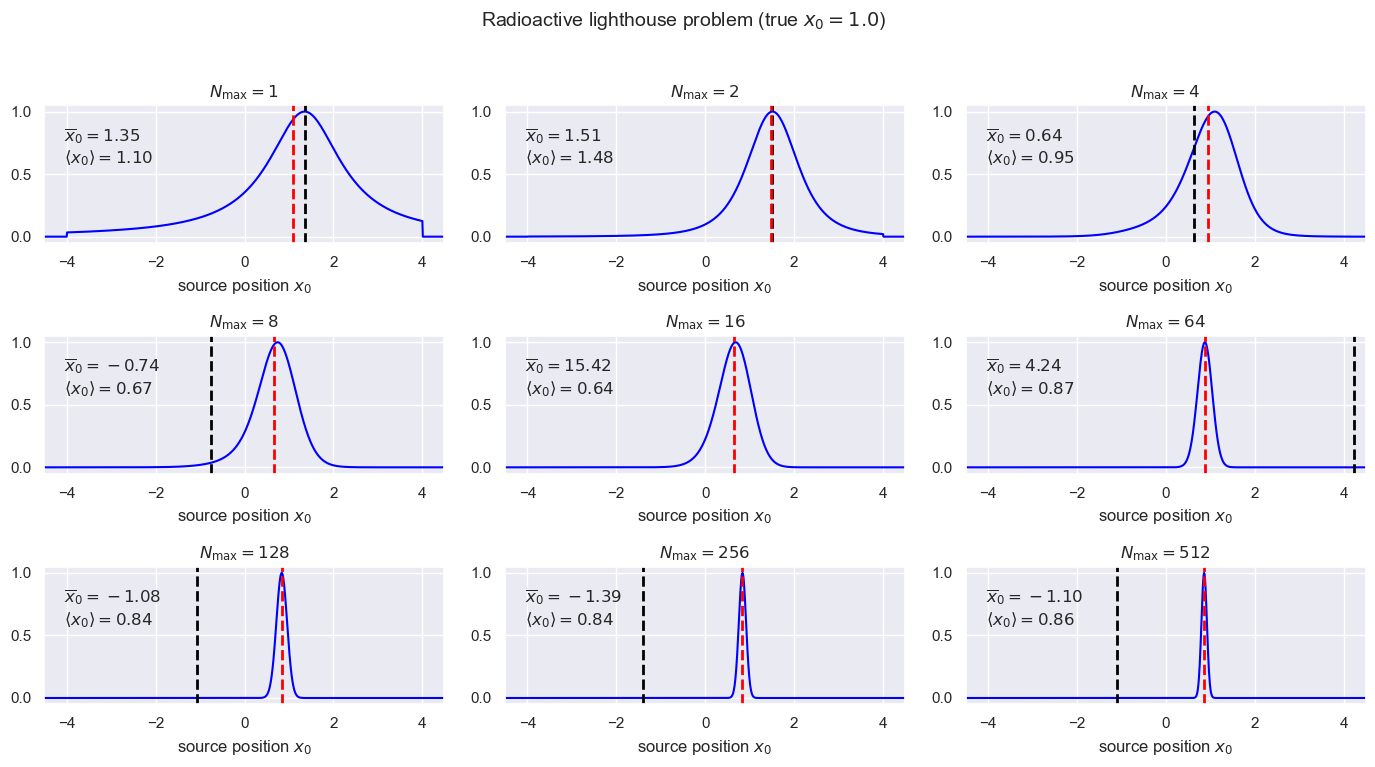

In [26]:
# True location of the radioactive source
x0_true = 1.
y0_true = 1.

# Distribution knowing where the source is: scipy.stats.cauchy(loc, scale)
num_pts = 512  # number of observations
dist = cauchy(x0_true, y0_true)   # sampling a Cauchy distribution directly
dist_pts = dist.rvs(num_pts)      # generate {x_k} for k = 1 to num_pts 

# Choose the set of N_max to be plotted (multiple of 3, up to num_pts)
N_max_values = [1, 2, 4, 8, 16, 64, 128, 256, 512]  

x0_min = -4.  # lower bound for prior
x0_max = +4.  # upper bound for prior
x0_pts = np.arange(-4.5, 4.5, 0.01)

fig = plt.figure(figsize=(14, 2.5*len(N_max_values)/3))

# Step through counter (k) for each N_max entry in N_max_values
for k, N_max in enumerate(N_max_values):  
    posterior_pts = posterior_calc(x0_pts, y0_true, dist_pts, N_max)
    mean_dist, max_posterior, mean_posterior = lighthouse_stats(dist_pts, 
                                                N_max, x0_pts, posterior_pts)
 
    # now make the plots: 3 to a row
    ax = fig.add_subplot(int(len(N_max_values)/3), 3, k+1)  
    ax.set_xlabel(r'source position $x_0$') 
    #ax.set_yticks([])  # turn off the plotting of ticks on the y-axis
    ax.plot(x0_pts, posterior_pts, color='blue')
    ax.set_title(rf'$N_{{\rm max}} = {N_max:d}$')
    ax.axvline(mean_dist, 0., 1.1, color='black', linestyle="--", lw=2)
    ax.axvline(mean_posterior, 0., 1.1, color='red', linestyle="--", lw=2)
    ax.set_xlim(np.min(x0_pts), np.max(x0_pts))
    
    stats_title = rf'$\overline{{x}}_0 = {mean_dist:.2f}$' + '\n' \
                  rf'$\langle x_0 \rangle = {mean_posterior:.2f}$'
    ax.annotate(stats_title, 
                xy=(0.05,0.85), xycoords='axes fraction', 
                horizontalalignment='left',verticalalignment='top')

figure_title = rf'Radioactive lighthouse problem (true $x_0 = {x0_true:.1f}$)'
fig.suptitle(figure_title, y=1.02, fontsize=14)

fig.tight_layout()

*Run the cell above several times for each $\Nmax$ and record the results in the table:*


In [6]:
%%html

<style> 
 table { width:80% !important; }
 table td, table th, table tr {border: 2px solid black !important; 
                               text-align:center !important;
                               font-size: 20px;}
</style>

|     $\Nmax$     | 1: $\langle x_0\rangle$ | 1: $\overline x_0$ | 2: $\langle x_0\rangle$ | 2: $\overline x_0$ | 3: $\langle x_0\rangle$ | 3: $\overline x_0$ |  
| :-------------: | :----------: | :-----------: | :-----------: | :-------------: | :----------: | :-----------: | 
|  1           |   .55     |    .66    |    2.39   |   4.66     |    1.04    |    10.54   |
|  2           |   1.83     |    2.19    |    1.17   |   2.30     |    1.32    |    5.84   |
|  4           |    3.07    |    2.79    |    .87   |   4.33     |    .81    |    3.16   |
|  16          |    2.11    |    3.13    |    2.69   |   6.50     |    .97    |    1.38   |
|  64          |    1.23    |    .88    |    1.22   |   6.95     |    1.11    |    4   |
|  256         |   1.03     |    1.08    |    1   |   1.81     |    1.06    |    1.70   |


&nbsp;10. *What are your observations about the posterior for $x_0$ as a function of $\Nmax$? Which mean (from the set of $\Nmax$ points or from the posterior) is the better estimate?*
<br>
<br>
The average posterior gets more accurate at higher numbers of points. The mean of the posterior is consistently better with the exception of the first set of trials' 64 point run, so I would say the mean of the posterior is a better estimate
<br>

&nbsp;11. *Why does the Central Limit Theorem appear to fail?*  (The mean from the set of $\Nmax$ samples does not tend to the true $x_0$.)
<br>
<br>
As said in the question, the mean tends to not approach the true value. This is because when an angle very close to the horizontal is chosen, its x value becomes very large in magnitude. This causes outliers to have a much greater impact on the average than if the points were uniformly or gaussian distributed in x. Here, the median would give a better estimation. It is possible that one single point can throw the average off by a significant amount, but with the median about half of all points will fall on wither side, and a single outlier doesn't have a significant effect.
<br>
<br>

Additional tasks:
* Convert to sample the distribution using MCMC.
* Generalize to find the joint posterior of $x_0$ and $y_0$.
* (suggest something!)

10.0